# notebook for data visualizations

In [57]:
# load csv
folder = "data/post_2024_06_09"
df = pd.read_csv("data/post_2024_06_09/all_votes.csv", sep=',')
df

,member.id,member.first_name,member.last_name,member.country.code,member.country.label,member.country.iso_alpha_2,member.group.code,member.group.label,member.group.short_label,169362,...,178484,178500,178702,178731,178767,178788,178875,178979,178988,179048
0,840,Charles,GOERENS,LUX,Luxembourg,LU,RENEW,Renew Europe,Renew,FOR,...,FOR,FOR,FOR,FOR,FOR,FOR,FOR,FOR,FOR,FOR
1,1294,Elio,DI RUPO,BEL,Belgium,BE,SD,Progressive Alliance of Socialists and Democrats,S&D,FOR,...,FOR,FOR,FOR,FOR,ABSTENTION,FOR,AGAINST,FOR,FOR,AGAINST
2,1909,Bernd,LANGE,DEU,Germany,DE,SD,Progressive Alliance of Socialists and Democrats,S&D,FOR,...,FOR,DID_NOT_VOTE,FOR,FOR,AGAINST,FOR,AGAINST,FOR,FOR,FOR
3,1917,Markus,FERBER,DEU,Germany,DE,EPP,European Peopleâs Party,EPP,FOR,...,FOR,FOR,FOR,FOR,FOR,FOR,FOR,FOR,FOR,AGAINST
4,1927,Peter,LIESE,DEU,Germany,DE,EPP,European Peopleâs Party,EPP,FOR,...,FOR,FOR,FOR,FOR,FOR,FOR,DID_NOT_VOTE,FOR,FOR,DID_NOT_VOTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,261796,SÃ©verine,WERBROUCK,FRA,France,FR,PFE,Patriots for Europe,Patriots for Europe,NaN,...,FOR,ABSTENTION,FOR,AGAINST,FOR,ABSTENTION,FOR,FOR,FOR,ABSTENTION
727,261797,Christophe,BAY,FRA,France,FR,PFE,Patriots for Europe,Patriots for Europe,NaN,...,FOR,ABSTENTION,FOR,AGAINST,FOR,ABSTENTION,FOR,FOR,FOR,ABSTENTION
728,262021,Hanna,GRONKIEWICZ-WALTZ,POL,Poland,PL,EPP,European Peopleâs Party,EPP,NaN,...,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE,DID_NOT_VOTE
729,267485,Volker,SCHNURRBUSCH,DEU,Germany,DE,ESN,Europe of Sovereign Nations,ESN,NaN,...,AGAINST,AGAINST,AGAINST,AGAINST,AGAINST,AGAINST,FOR,ABSTENTION,FOR,AGAINST


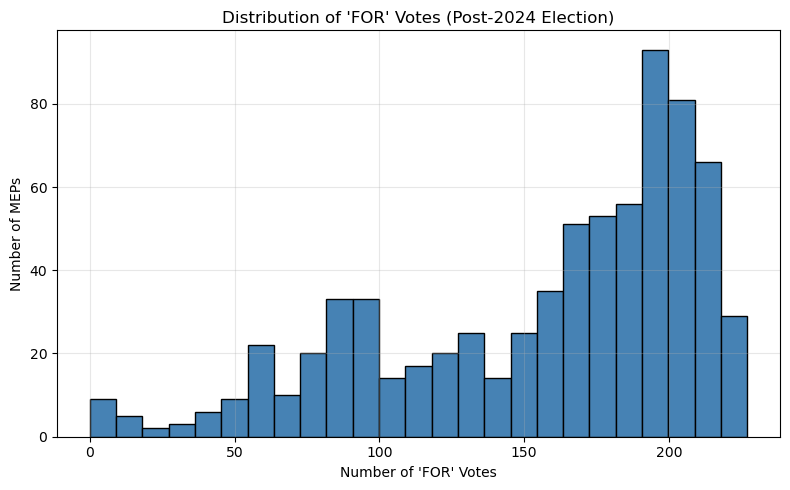

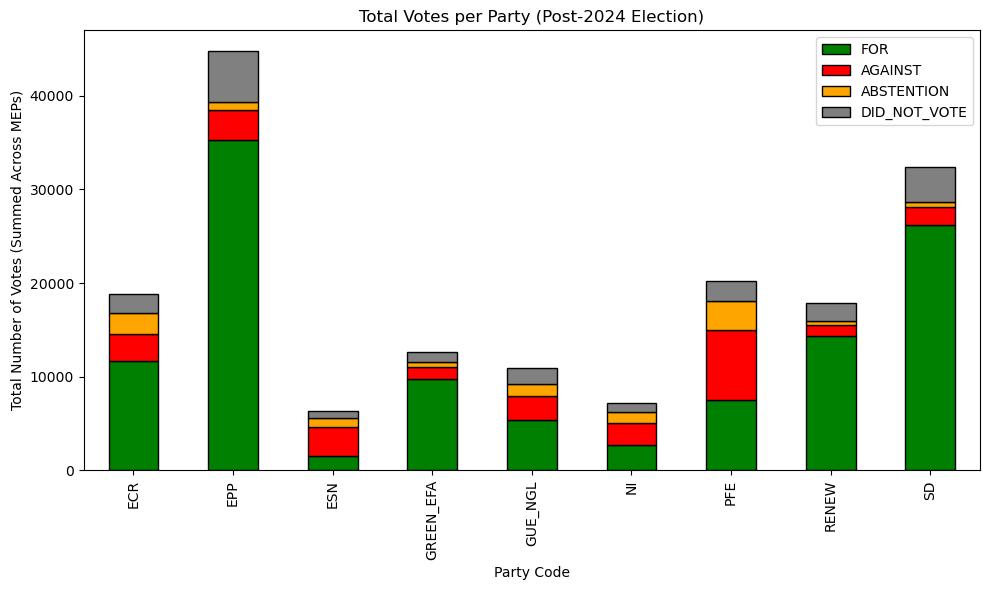

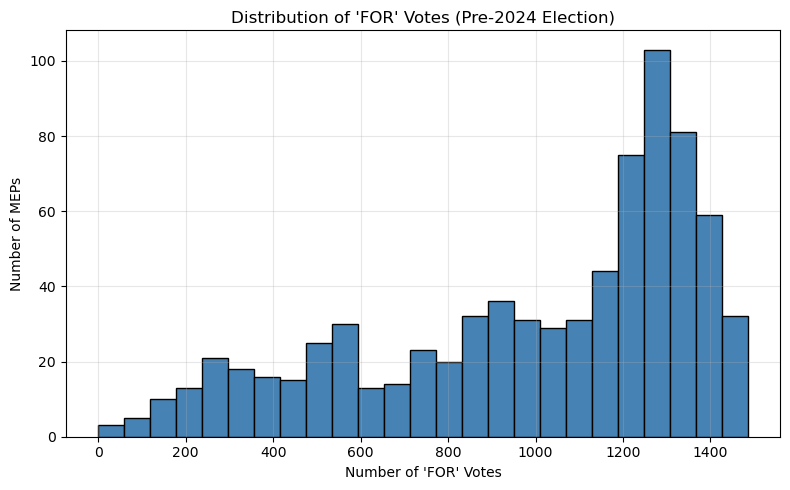

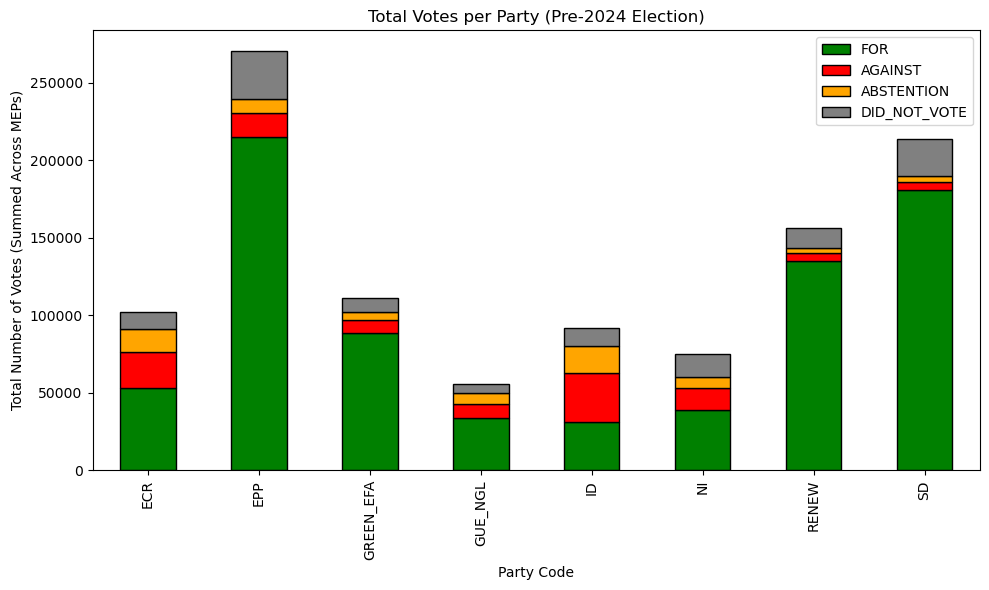

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

def summarize_votes(file_path, label):
    df = pd.read_csv(file_path, sep=',')
    vote_cols = [c for c in df.columns if c.isdigit()]

    df["num_FOR"] = (df[vote_cols] == "FOR").sum(axis=1)
    df["num_AGAINST"] = (df[vote_cols] == "AGAINST").sum(axis=1)
    df["num_ABSTENTION"] = (df[vote_cols] == "ABSTENTION").sum(axis=1)
    df["num_DID_NOT_VOTE"] = (df[vote_cols] == "DID_NOT_VOTE").sum(axis=1)

    summary = df[[
        "member.id", "member.first_name", "member.last_name",
        "member.group.code", "member.group.label", "member.country.label",
        "num_FOR", "num_AGAINST", "num_ABSTENTION", "num_DID_NOT_VOTE"
    ]]

    plt.figure(figsize=(8,5))
    plt.hist(summary["num_FOR"], bins=25, color="steelblue", edgecolor="black")
    plt.title(f"Distribution of 'FOR' Votes ({label})")
    plt.xlabel("Number of 'FOR' Votes")
    plt.ylabel("Number of MEPs")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    summary.groupby("member.group.code")[["num_FOR", "num_AGAINST", "num_ABSTENTION", "num_DID_NOT_VOTE"]]\
        .sum()\
        .plot(
            kind="bar",
            stacked=True,
            figsize=(10,6),
            color=["green", "red", "orange", "gray"],
            edgecolor="black"
        )
    plt.title(f"Total Votes per Party ({label})")
    plt.ylabel("Total Number of Votes (Summed Across MEPs)")
    plt.xlabel("Party Code")
    plt.legend(["FOR", "AGAINST", "ABSTENTION", "DID_NOT_VOTE"])
    plt.tight_layout()
    plt.show()

    return summary

# Run for both datasets
summary_2024 = summarize_votes("data/post_2024_06_09/all_votes.csv", "Post-2024 Election")
summary_old = summarize_votes("data/2021_to_2024_pre_election/all_votes.csv", "Pre-2024 Election")

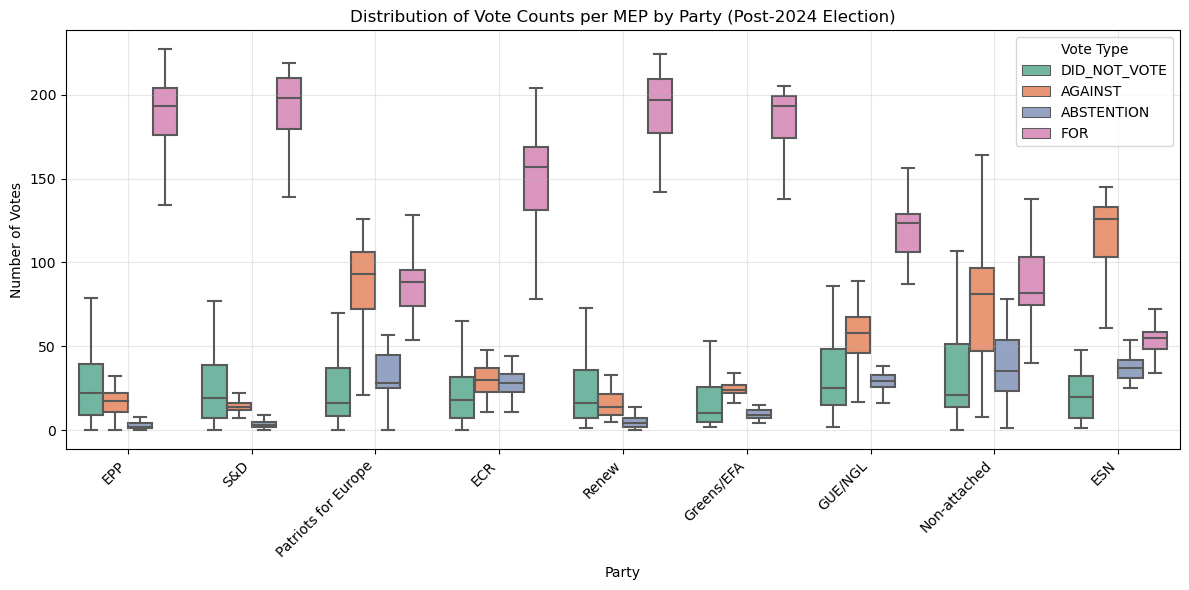

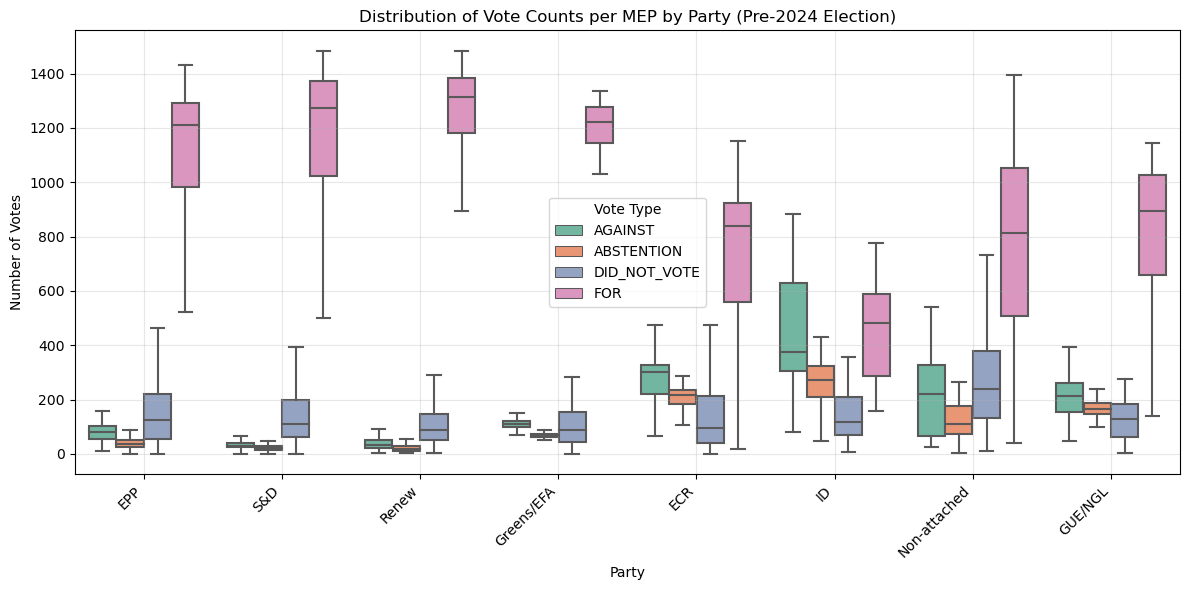

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vote_distribution(file_path, label):
    df = pd.read_csv(file_path, sep=',')
    vote_cols = [c for c in df.columns if c.isdigit()]

    counts = pd.DataFrame({
        "member": df["member.first_name"] + " " + df["member.last_name"],
        "party": df["member.group.short_label"],
        "num_FOR": (df[vote_cols] == "FOR").sum(axis=1),
        "num_AGAINST": (df[vote_cols] == "AGAINST").sum(axis=1),
        "num_ABSTENTION": (df[vote_cols] == "ABSTENTION").sum(axis=1),
        "num_DID_NOT_VOTE": (df[vote_cols] == "DID_NOT_VOTE").sum(axis=1),
    })

    counts_melted = counts.melt(
        id_vars=["member", "party"],
        value_vars=["num_FOR", "num_AGAINST", "num_ABSTENTION", "num_DID_NOT_VOTE"],
        var_name="vote_type",
        value_name="count"
    )
    counts_melted["vote_type"] = counts_melted["vote_type"].str.replace("num_", "")
    # order by number of meps per party
    counts_melted["party"] = pd.Categorical(counts_melted["party"], categories=counts_melted["party"].value_counts().index, ordered=True)
    counts_melted = counts_melted.sort_values("party")

    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=counts_melted,
        x="party",
        y="count",
        hue="vote_type",
        showfliers=False,
        palette="Set2"
    )
    plt.title(f"Distribution of Vote Counts per MEP by Party ({label})")
    plt.ylabel("Number of Votes")
    plt.xlabel("Party")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Vote Type")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run for both datasets
plot_vote_distribution("data/post_2024_06_09/all_votes.csv", "Post-2024 Election")
plot_vote_distribution("data/2021_to_2024_pre_election/all_votes.csv", "Pre-2024 Election")

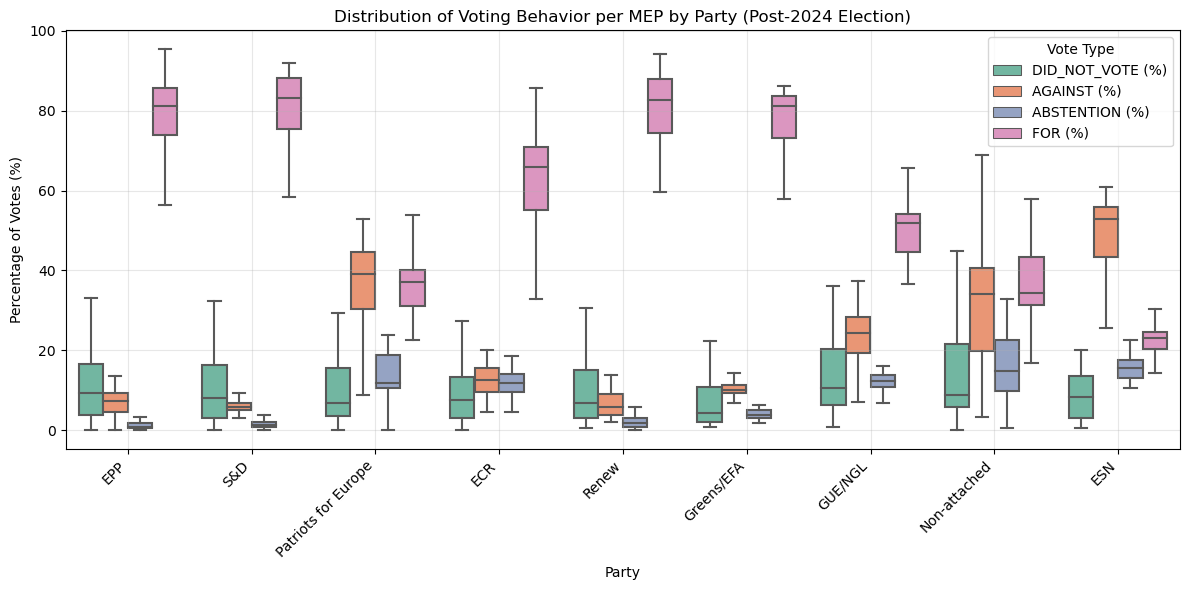

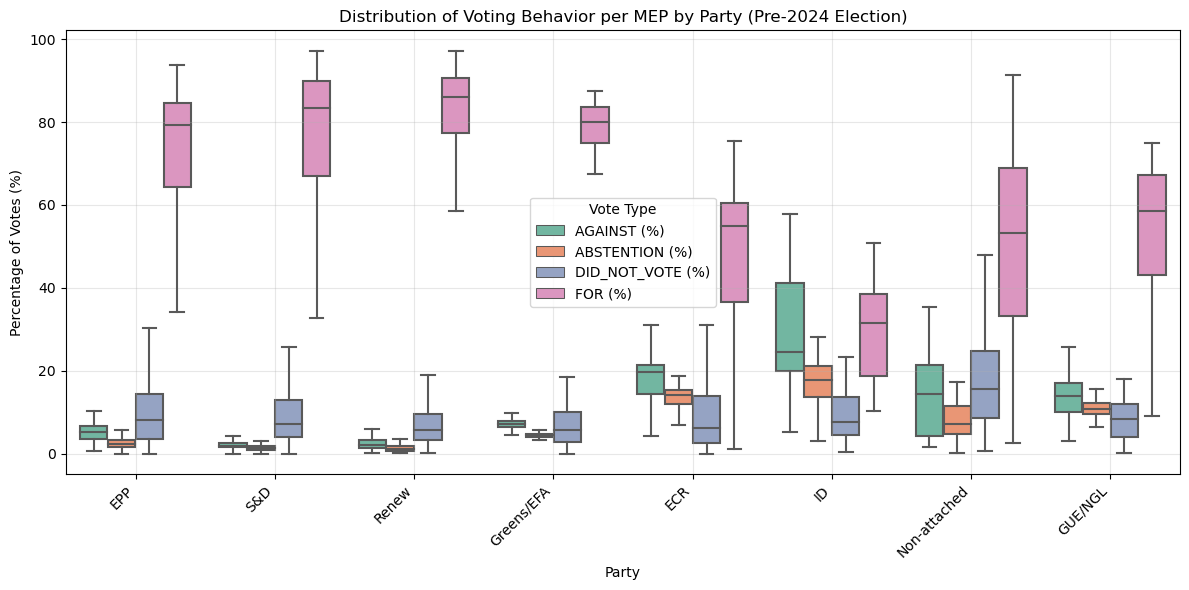

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vote_distribution_percent(file_path, label):
    df = pd.read_csv(file_path, sep=',')
    vote_cols = [c for c in df.columns if c.isdigit()]

    total_votes = len(vote_cols)

    counts = pd.DataFrame({
        "member": df["member.first_name"] + " " + df["member.last_name"],
        "party": df["member.group.short_label"],
        "FOR (%)": (df[vote_cols] == "FOR").sum(axis=1) / total_votes * 100,
        "AGAINST (%)": (df[vote_cols] == "AGAINST").sum(axis=1) / total_votes * 100,
        "ABSTENTION (%)": (df[vote_cols] == "ABSTENTION").sum(axis=1) / total_votes * 100,
        "DID_NOT_VOTE (%)": (df[vote_cols] == "DID_NOT_VOTE").sum(axis=1) / total_votes * 100,
    })

    counts_melted = counts.melt(
        id_vars=["member", "party"],
        value_vars=["FOR (%)", "AGAINST (%)", "ABSTENTION (%)", "DID_NOT_VOTE (%)"],
        var_name="vote_type",
        value_name="percentage"
    )

    # order by number of meps per party
    counts_melted["party"] = pd.Categorical(counts_melted["party"], categories=counts_melted["party"].value_counts().index, ordered=True)
    counts_melted = counts_melted.sort_values("party")

    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=counts_melted,
        x="party",
        y="percentage",
        hue="vote_type",
        showfliers=False,
        palette="Set2"
    )
    plt.title(f"Distribution of Voting Behavior per MEP by Party ({label})")
    plt.ylabel("Percentage of Votes (%)")
    plt.xlabel("Party")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Vote Type")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run for both datasets
plot_vote_distribution_percent("data/post_2024_06_09/all_votes.csv", "Post-2024 Election")
plot_vote_distribution_percent("data/2021_to_2024_pre_election/all_votes.csv", "Pre-2024 Election")

In [72]:
import pandas as pd
from collections import Counter
import time

def name_function(filepath, label):
    """
    Extract and count ALL coalition patterns (party majorities per vote),
    and compute how often each coalition leads to an adopted resolution.
    """

    print(f"\n=== Processing {label} ===")
    start_time = time.time()

    df = pd.read_csv(filepath, sep=",")
    meta_cols = [c for c in df.columns if c.startswith("member.")]
    vote_cols = [c for c in df.columns if c.isdigit()]
    if not vote_cols:
        raise ValueError("No numeric vote columns found.")

    party_col = next((c for c in df.columns if "group.short_label" in c), None)
    if party_col is None:
        raise ValueError("No party column found (expected 'member.group.short_label').")

    parties = sorted(df[party_col].dropna().unique().tolist())

    print(f"📘 Found {len(parties)} parties:")
    for i, p in enumerate(parties):
        print(f"  Index {i}: {p}")
    print()

    coalition_counts = Counter()
    coalition_success = Counter()
    coalition_list = []

    total_votes = len(vote_cols)
    print(f"Found {total_votes} roll-call votes.\n")

    for idx, vote in enumerate(vote_cols, start=1):
        vote_df = df[["member.id", party_col, vote]].dropna(subset=[party_col])
        if vote_df.empty:
            continue

        # 🧮 Compute result (ADOPTED vs REJECTED)
        n_for = (vote_df[vote] == "FOR").sum()
        n_against = (vote_df[vote] == "AGAINST").sum()
        if n_for > n_against:
            result = "ADOPTED"
        elif n_against > n_for:
            result = "REJECTED"
        else:
            result = "TIE"

        # 🧩 Compute coalition pattern (party majorities)
        party_majorities = {}
        for p in parties:
            subset = vote_df[vote_df[party_col] == p]
            if subset.empty:
                party_majorities[p] = None
                continue
            n_for_p = (subset[vote] == "FOR").sum()
            n_against_p = (subset[vote] == "AGAINST").sum()
            if n_for_p > n_against_p:
                party_majorities[p] = 1
            elif n_against_p > n_for_p:
                party_majorities[p] = 0
            else:
                party_majorities[p] = None  # tie

        pattern = [party_majorities.get(p) for p in parties]
        coalition_str = ''.join(['1' if v == 1 else '0' if v == 0 else '-' for v in pattern])

        coalition_counts[coalition_str] += 1
        if result == "ADOPTED":
            coalition_success[coalition_str] += 1

        coalition_list.append({
            "vote_id": vote,
            **{p: party_majorities.get(p) for p in parties},
            "coalition_str": coalition_str,
            "result": result
        })

        if idx % 50 == 0 or idx == total_votes:
            elapsed = time.time() - start_time
            print(f"  Processed {idx}/{total_votes} votes ({idx/total_votes:.1%}) - elapsed: {elapsed:.1f}s")

    df_coalitions = pd.DataFrame(coalition_list)
    total_time = time.time() - start_time

    total_votes_analyzed = sum(coalition_counts.values())
    coalition_percentages = {k: (v / total_votes_analyzed) * 100 for k, v in coalition_counts.items()}

    print(f"\n✅ {len(df_coalitions)} valid votes processed")
    print(f"✅ {len(coalition_counts)} unique coalition patterns found")
    print(f"⏱️ Total runtime: {total_time:.2f} seconds\n")

    print("Most frequent coalition types:")
    print("(1 = FOR majority, 0 = AGAINST majority, - = tie / no majority)\n")

    # Sort by frequency (not filtering out anything)
    for k, v in sorted(coalition_counts.items(), key=lambda x: x[1], reverse=True)[:20]:
        pct = coalition_percentages[k]
        success = coalition_success.get(k, 0)
        success_rate = (success / v * 100) if v > 0 else 0
        print(f"  {k}: {v} votes ({pct:.2f}%), approval success = {success_rate:.1f}%")

    # Return complete tables
    df_summary = pd.DataFrame([
        {"coalition": k, "count": v,
         "percentage": coalition_percentages[k],
         "success_rate": (coalition_success.get(k, 0) / v * 100) if v > 0 else 0}
        for k, v in coalition_counts.items()
    ]).sort_values("count", ascending=False)

    return coalition_counts, df_coalitions, coalition_percentages, coalition_success, parties, df_summary


# =====================================================
# Example usage
# =====================================================

post_counts, post_df, post_pct, post_success, post_parties, post_summary = name_function(
    "data/post_2024_06_09/all_votes.csv", "Post-2024 Election"
)

pre_counts, pre_df, pre_pct, pre_success, pre_parties, pre_summary = name_function(
    "data/2021_to_2024_pre_election/all_votes.csv", "Pre-2024 Election"
)


=== Processing Post-2024 Election ===
📘 Found 9 parties:
  Index 0: ECR
  Index 1: EPP
  Index 2: ESN
  Index 3: GUE/NGL
  Index 4: Greens/EFA
  Index 5: Non-attached
  Index 6: Patriots for Europe
  Index 7: Renew
  Index 8: S&D

Found 238 roll-call votes.

  Processed 50/238 votes (21.0%) - elapsed: 0.4s
  Processed 100/238 votes (42.0%) - elapsed: 0.5s
  Processed 150/238 votes (63.0%) - elapsed: 0.6s
  Processed 200/238 votes (84.0%) - elapsed: 0.8s
  Processed 238/238 votes (100.0%) - elapsed: 0.9s

✅ 238 valid votes processed
✅ 51 unique coalition patterns found
⏱️ Total runtime: 0.87 seconds

Most frequent coalition types:
(1 = FOR majority, 0 = AGAINST majority, - = tie / no majority)

  111111111: 38 votes (15.97%), approval success = 100.0%
  110110011: 26 votes (10.92%), approval success = 100.0%
  110010011: 19 votes (7.98%), approval success = 100.0%
  110111011: 19 votes (7.98%), approval success = 100.0%
  110111111: 16 votes (6.72%), approval success = 100.0%
  0100100

In [70]:
# sanity check for budget approval
print(post_df[post_df['vote_id'] == '169987'])

   vote_id  ECR  EPP  ESN  GUE/NGL  Greens/EFA  Non-attached   
18  169987    1    1  0.0      0.0         0.0           0.0  \

    Patriots for Europe  Renew  S&D coalition_str  
18                    0      0    0     110000000  


# Generate plots to show results of vote calls

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIG ===
votes_path = "data/post_2024_06_09/all_votes.csv"              # vote data
meta_path = "data/all_votes_with_subjects.csv"  # metadata
output_dir = "vote_plots"
os.makedirs(output_dir, exist_ok=True)

# === LOAD ===
df = pd.read_csv(votes_path)
meta = pd.read_csv(meta_path)
meta["id"] = meta["id"].astype(str)

vote_cols = [c for c in df.columns if c.isdigit()]

df[vote_cols] = df[vote_cols].replace({
    "FOR": "For",
    "AGAINST": "Against",
    "ABSTENTION": "Abstention",
    "DID_NOT_VOTE": "DNV"
})

# === LOOP OVER VOTES ===
for vote_id in vote_cols:
    # --- Metadata ---
    title = meta.loc[meta["id"] == vote_id, "title"].values
    title_text = title[0] if len(title) else f"Vote {vote_id}"

    # --- Aggregate per group ---
    summary = (
        df.groupby("member.group.short_label")[vote_id]
        .value_counts()
        .unstack(fill_value=0)
        .reindex(columns=["For", "Against", "Abstention"], fill_value=0)
    )
    if summary.sum().sum() == 0:
        continue

    # Sort by net difference (for nicer layout)
    summary["net"] = summary["For"] - summary["Against"]
    summary = summary.sort_values("net")

    # --- Global outcome ---
    totals = df[vote_id].value_counts()
    n_for = int(totals.get("For", 0))
    n_against = int(totals.get("Against", 0))
    n_abst = int(totals.get("Abstention", 0))
    total_voters = n_for + n_against + n_abst
    outcome = (
        f"Overall outcome: {total_voters} total votes "
        f"({n_for} in favour, {n_against} against, {n_abst} abstained)"
    )

        # --- FIX PARTY ORDERING ---
    party_order = [
        "GUE/NGL", "Greens/EFA", "S&D", "Renew", 
        "EPP", "ECR", "Patriots for Europe", "ESN", "Non-attached"
    ]

    # Reindex your summary DataFrame to match that order
    summary = summary.reindex(party_order).fillna(0)

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.bar(summary.index, summary["For"], color="#2ca02c", label="For")
    ax.bar(summary.index, -summary["Against"], color="#d62728", label="Against")
    ax.bar(summary.index, summary["Abstention"], color="#ffbf00", label="Abstention")

    ax.axhline(0, color="black", lw=1)
    ax.set_title(title_text, fontsize=12, pad=12)
    ax.set_ylabel("Number of MEPs")
    ax.set_xlabel("Political Group")
    plt.xticks(rotation=30, ha="right")
    ax.grid(axis="y", alpha=0.3)
    ax.legend(frameon=False, loc="upper right")

    # --- Add outcome text below plot ---
    plt.figtext(
        0.5, -0.02, outcome,
        wrap=True, ha="center", va="top", fontsize=9, color="dimgray"
    )

    # --- Save ---
    safe_title = "".join(c if c.isalnum() or c in " _-" else "_" for c in title_text)
    filename = os.path.join(output_dir, f"{vote_id}_{safe_title[:50]}.png")
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.18)  # make space for the sentence
    plt.savefig(filename, dpi=150, bbox_inches="tight")
    plt.close(fig)

print(f"✅ Generated {len(vote_cols)} plots with outcome text in '{output_dir}/'")

✅ Generated 238 plots with outcome text in 'vote_plots/'


In [199]:
# ============================================================
# EP coalition ideology ridge plots (4 views in one script)
# - Data inputs:
#     1) Pre:  'data/2021_to_2024_pre_election/all_votes.csv'   (or 'data/2019_to_2024/all_votes.csv')
#     2) Post: 'data/post_2024_06_09/all_votes.csv'
#     3) Vote metadata (subjects/titles): 'all_votes_with_subjects.csv'
# - Output: Plots of the ideology of the majority coalition for each vote and topic
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from helpers import *

# ---------- Config ----------
PRE_PATH  = 'data/2021_to_2024_pre_election/all_votes.csv'   # or 'data/2019_to_2024/all_votes.csv'
POST_PATH = 'data/post_2024_06_09/all_votes.csv'
META_PATH = 'data/all_votes_with_subjects.csv'
TOPICS_PATH = 'data/votes_with_macrotopics.csv'

# fixed party order
PARTY_ORDER = [
    "The Left", "GUE/NGL", "Greens/EFA", "S&D", "Renew", "EPP", "ECR", "PFE", "ESN", "Non-attached", "NI", "ID"
]
# Fall-backs for labels seen in datasets
PARTY_ALIASES = {
    "The Left": "GUE/NGL", "NI": "Non-attached", "ID": "PFE"  # ID = PFE
}

OUTDIR = Path("./figs/")
OUTDIR.mkdir(exist_ok=True)

# ---------- Helpers ----------

def load_votes(csv_path):
    df = pd.read_csv(csv_path)
    vote_cols = [c for c in df.columns if c.isdigit()]
    # Normalize party labels
    party_col = "member.group.short_label"
    if party_col not in df.columns:
        raise ValueError("Expected 'member.group.short_label' in data")
    df[party_col] = df[party_col].replace(PARTY_ALIASES)
    return df, vote_cols, party_col

def encode_votes_matrix(df, vote_cols, fill=0.0):
    # Map votes to numeric for ideology: FOR=+1, AGAINST=-1, ABST=0, DNV=NaN -> fill
    enc = {'FOR': 1.0, 'AGAINST': -1.0, 'ABSTENTION': 0.0, 'DID_NOT_VOTE': np.nan}
    M = df[vote_cols].replace(enc).to_numpy(dtype=float)
    col_mean = np.nanmean(M, axis=0, keepdims=True)
    M_centered = M - col_mean
    return np.nan_to_num(M_centered, nan=fill), M  # (for PCA; and raw encoded matrix)

def ideology_scores_from_pca(M_centered):
    # 1D ideology = first PC (sign made consistent so higher = more "pro-FOR" on avg)
    pca = PCA(n_components=1, random_state=42)
    s = pca.fit_transform(M_centered)[:, 0]
    # z-score for comparability
    s = (s - s.mean()) / (s.std() + 1e-9)
    return s

def vote_outcome_counts(col_series):
    # counts per option
    vc = col_series.value_counts()
    return {
        "FOR": int(vc.get("FOR", 0)),
        "AGAINST": int(vc.get("AGAINST", 0)),
        "ABSTENTION": int(vc.get("ABSTENTION", 0)),
        "DNV": int(vc.get("DID_NOT_VOTE", 0))
    }

def majority_side(counts):
    # return "FOR" or "AGAINST" (ignore ABST/DNV for decision)
    return "FOR" if counts["FOR"] >= counts["AGAINST"] else "AGAINST"

def ridge(ax, data, label, color, kde_kws=None):
    kde_kws = kde_kws or {}
    sns.kdeplot(data, ax=ax, fill=True, alpha=0.6, linewidth=0.8, color=color, **kde_kws)
    ax.axvline(np.median(data), color=color, lw=1.2, alpha=0.9)
    ax.set_yticks([])
    ax.set_ylabel(label, rotation=0, ha='right', va='center')
    for spine in ["top","right","left"]:
        ax.spines[spine].set_visible(False)

def prepare_ridge_axes(n_rows, n_cols=3, height=0.8, width=10):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width, max(2.5, n_rows*height)), sharex=True)
    if n_rows == 1 and n_cols > 1:
        axes = np.array([axes])  # row vector -> 2D
    return fig, axes

def groups_in_order(labels):
    # Return party order intersected with labels, then append others
    seen = set(labels)
    ordered = [p for p in PARTY_ORDER if p in seen]
    ordered += [p for p in sorted(seen) if p not in ordered]
    return ordered

# ---------- 0) Load datasets & compute ideology per MEP ----------
df_pre, vote_cols_pre, party_col = load_votes(PRE_PATH)
df_post, vote_cols_post, _ = load_votes(POST_PATH)

Mcent_pre, Mraw_pre   = encode_votes_matrix(df_pre, vote_cols_pre, fill=0.0)
Mcent_post, Mraw_post = encode_votes_matrix(df_post, vote_cols_post, fill=0.0)

ideo_pre  = ideology_scores_from_pca(Mcent_pre)
ideo_post = ideology_scores_from_pca(Mcent_post)

# attach ideology/party to frames
df_pre["_ideo"]  = ideo_pre
df_post["_ideo"] = ideo_post

# ============================================================
# (1) Compare pre vs post: KDE ridges of majority coalitions
# ============================================================

def majority_ideo_distribution(df, vote_cols):
    vals = []
    for c in vote_cols:
        counts = vote_outcome_counts(df[c])
        side = majority_side(counts)
        voters = df.loc[df[c] == side, "_ideo"].to_numpy()
        if len(voters) >= 3:
            vals.extend(voters.tolist())
    return np.array(vals)

maj_pre  = majority_ideo_distribution(df_pre,  vote_cols_pre)
maj_post = majority_ideo_distribution(df_post, vote_cols_post)

fig, axes = plt.subplots(2, 1, figsize=(9, 4), sharex=True)
ridge(axes[0], maj_pre,  "Pre: majority",  color="#4c78a8")
ridge(axes[1], maj_post, "Post: majority", color="#f58518")
axes[1].set_xlim(-3.5, 3.5)
fig.suptitle("Majority coalition ideology (pre vs post)", fontsize=13, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.savefig(OUTDIR/"fig_majority_ideology.png", dpi=200)
plt.close(fig)

# ============================================================
# (2) Per-topic coalitions: ridge per top subjects (from metadata)
# ============================================================

meta = pd.read_csv(TOPICS_PATH)
# expand subjects into list per vote id
def split_subjects(s):
    if pd.isna(s): return []
    return [x.strip() for x in str(s).split(";") if x.strip()]

meta["vote_number"] = meta["vote_number"].astype(str)
meta["macrotopic"] = meta["macrotopic"].apply(split_subjects)
# print how many unique macrotopics
# Flatten all lists and count unique macrotopics
all_macrotopics = [m for sublist in meta["macrotopic"] for m in sublist]
print(set(all_macrotopics))

# Choose top subjects by frequency (post period)
vote_ids_post = set(vote_cols_post)
subject_counts = {}
for _, row in meta.iterrows():
    if row["vote_number"] in vote_ids_post:
        for subj in row["macrotopic"]:
            subject_counts[subj] = subject_counts.get(subj, 0) + 1
top_subjects = [s for s, _ in sorted(subject_counts.items(), key=lambda x: x[1], reverse=True)]

def ideology_by_subject(df, vote_cols, subjects, title, outpath):
    # Map vote_id -> subject list
    submap = {row["vote_number"]: row["macrotopic"] for _, row in meta.iterrows()}
    fig, ax = plt.subplots(len(subjects), 1, figsize=(10, 1.8*len(subjects)), sharex=True)
    if len(subjects) == 1: ax = [ax]
    for i, s in enumerate(subjects):
        vals = []
        for c in vote_cols:
            if submap.get(c) and s in submap[c]:
                side = majority_side(vote_outcome_counts(df[c]))
                voters = df.loc[df[c] == side, "_ideo"].to_numpy()
                if len(voters) >= 3:
                    vals.extend(voters.tolist())
        if len(vals) >= 10 and np.std(vals) > 1e-6:
            ridge(ax[i], np.array(vals), s, color="#54a24b")
            ax[i].set_xlim(-3.5, 3.5)
        else:
            ax[i].text(0.02, 0.3, f"{s} (insufficient data)", transform=ax[i].transAxes)
    fig.suptitle(title, fontsize=13, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig(outpath, dpi=200)
    plt.close(fig)

ideology_by_subject(df_post, vote_cols_post, top_subjects,
                    "Post-election: majority ideology by topic",
                    OUTDIR/"fig_topics_post.png")
ideology_by_subject(df_pre, vote_cols_pre, top_subjects,
                    "Pre-election: majority ideology by topic",
                    OUTDIR/"fig_topics_pre.png")

combine_plots(OUTDIR / "fig_topics_pre.png", OUTDIR / "fig_topics_post.png", OUTDIR / "fig_topics.png")

{'Governance, Democracy & Institutional Affairs', 'Development, Humanitarian & Global Partnerships', 'Technology, Digital & Innovation', 'Budget, Finance & Fiscal Policy', 'Economy, Trade & Industry', 'Environment, Climate & Energy', 'Agriculture, Fisheries & Rural Development', 'Health, Safety & Consumer Protection', 'Justice, Rule of Law & Fundamental Rights', 'Unclassified', 'Foreign Policy, Security & Human Rights', 'Social Policy, Cohesion & Employment', 'Migration, Security & Civil Protection'}
✅ Saved combined image to figs/fig_topics.png


In [184]:
# ============================================================
# (2) Per-topic coalitions: ridges of FOR / AGAINST / ABSTENTION / DNV voters
# ============================================================

meta = pd.read_csv(TOPICS_PATH)

def split_subjects(s):
    if pd.isna(s):
        return []
    return [x.strip() for x in str(s).split(";") if x.strip()]

meta["vote_number"] = meta["vote_number"].astype(str)
meta["macrotopic"] = meta["macrotopic"].apply(split_subjects)

# --- Collect top topics (across both legislatures) ---
vote_ids_all = set(vote_cols_pre) | set(vote_cols_post)
subject_counts = {}
for _, row in meta.iterrows():
    vid = row["vote_number"]
    if vid in vote_ids_all:
        for subj in row["macrotopic"]:
            subject_counts[subj] = subject_counts.get(subj, 0) + 1
top_subjects = [s for s, _ in sorted(subject_counts.items(), key=lambda x: x[1], reverse=True)]

def ideology_by_subject_full(df, vote_cols, subjects, title, outpath):
    """
    For each macrotopic:
      - Collect ideology of FOR / AGAINST / ABSTENTION / DNV voters
      - Plot 4 overlapping ridges (green, red, gray, dark gray)
      - Add in brackets the number of resolutions belonging to that topic
    """
    submap = {row["vote_number"]: row["macrotopic"] for _, row in meta.iterrows()}

    # --- Count how many votes per macrotopic ---
    topic_counts = {}
    for _, row in meta.iterrows():
        vid = row["vote_number"]
        if vid in vote_cols:
            for t in row["macrotopic"]:
                topic_counts[t] = topic_counts.get(t, 0) + 1

    n_rows = len(subjects)
    fig, axes = plt.subplots(n_rows, 1, figsize=(10, 2.4 * n_rows), sharex=True)
    if n_rows == 1:
        axes = [axes]

    for i, s in enumerate(subjects):
        ax = axes[i]
        vals_for, vals_against, vals_abst, vals_dnv = [], [], [], []

        # Collect ideology values per topic
        for c in vote_cols:
            if submap.get(c) and s in submap[c]:
                vals_for.extend(df.loc[df[c] == "FOR", "_ideo"].to_list())
                vals_against.extend(df.loc[df[c] == "AGAINST", "_ideo"].to_list())
                vals_abst.extend(df.loc[df[c] == "ABSTENTION", "_ideo"].to_list())
                vals_dnv.extend(df.loc[df[c] == "DID_NOT_VOTE", "_ideo"].to_list())

        plotted = False
        if len(vals_for) >= 5:
            sns.kdeplot(vals_for, ax=ax, fill=True, color="#54a24b", alpha=0.6, label="FOR")
            plotted = True
        if len(vals_against) >= 5:
            sns.kdeplot(vals_against, ax=ax, fill=True, color="#e45756", alpha=0.5, label="AGAINST")
            plotted = True
        if len(vals_abst) >= 5:
            sns.kdeplot(vals_abst, ax=ax, fill=True, color="#b0b0b0", alpha=0.5, label="ABSTENTION")
            plotted = True
        if len(vals_dnv) >= 5:
            sns.kdeplot(vals_dnv, ax=ax, fill=True, color="#3a3a3a", alpha=0.4, linestyle="--", label="DID NOT VOTE")
            plotted = True

        # Add vertical line for 0 (neutral ideology)
        ax.axvline(0, color="black", lw=0.8, ls="--", alpha=0.7)
        ax.set_xlim(-3.5, 3.5)
        ax.set_yticks([])

        # Add label with number of votes
        n_votes = topic_counts.get(s, 0)
        label = f"{s} ({n_votes})" if n_votes else s
        ax.set_ylabel(label, rotation=0, ha='right', va='center', fontsize=9)

        for spine in ["top", "right", "left"]:
            ax.spines[spine].set_visible(False)

        if not plotted:
            ax.text(0.02, 0.3, f"{s} (no data)", transform=ax.transAxes)

    axes[0].legend(loc="upper right", frameon=False, fontsize=8)
    fig.suptitle(title, fontsize=13, y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    fig.savefig(outpath, dpi=200)
    plt.close(fig)

# --- Run for both legislatures ---
ideology_by_subject_full(
    df_post, vote_cols_post, top_subjects,
    "Post-election: ideology distributions per macrotopic (FOR / AGAINST / ABSTENTION / DNV)",
    OUTDIR / "fig_topics_post_full.png"
)

ideology_by_subject_full(
    df_pre, vote_cols_pre, top_subjects,
    "Pre-election: ideology distributions per macrotopic (FOR / AGAINST / ABSTENTION / DNV)",
    OUTDIR / "fig_topics_pre_full.png"
)

combine_plots(OUTDIR / "fig_topics_pre_full.png", OUTDIR / "fig_topics_post_full.png", OUTDIR / "fig_topics_full.png")

✅ Saved combined image to figs/fig_topics_full.png


In [137]:
# print how many vote cols in df_all
print(f"Number of vote columns in df_all: {len(vote_cols_pre + vote_cols_post)}")

Number of vote columns in df_all: 1765


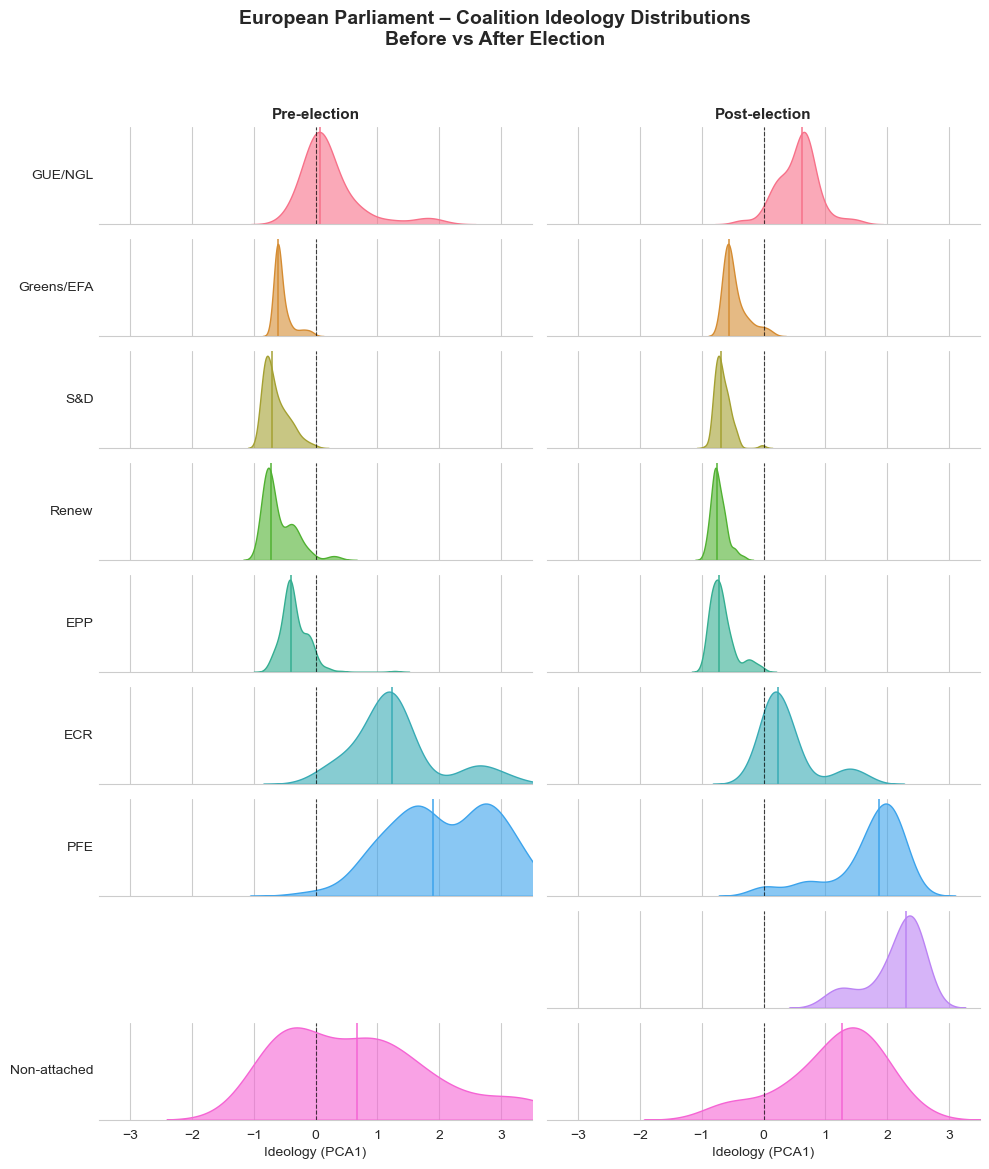

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# === CONFIG ===
PRE_PATH  = 'data/2021_to_2024_pre_election/all_votes.csv'
POST_PATH = 'data/post_2024_06_09/all_votes.csv'

# Consistent order across legislatures
PARTY_ORDER = [
    "GUE/NGL", "Greens/EFA", "S&D", "Renew", "EPP",
    "ECR", "PFE", "ESN", "Non-attached"
]

# Harmonized naming across datasets
PARTY_ALIASES = {
    "The Left": "GUE/NGL",
    "NI": "Non-attached",
    "ID": "PFE",
    "Patriots for Europe": "PFE",  # ensure full name also maps
    "Identity and Democracy": "PFE"  # fallback for legacy naming
}

# === HELPERS ===
def load_and_encode(path):
    df = pd.read_csv(path)
    vote_cols = [c for c in df.columns if c.isdigit()]
    df["member.group.short_label"] = df["member.group.short_label"].replace(PARTY_ALIASES)
    
    enc = {'FOR': 1, 'AGAINST': -1, 'ABSTENTION': 0, 'DID_NOT_VOTE': np.nan}
    M = df[vote_cols].replace(enc)
    M = M - np.nanmean(M, axis=0)
    M = np.nan_to_num(M, nan=0.0)
    
    pca = PCA(n_components=1, random_state=42)
    s = pca.fit_transform(M)[:, 0]
    s = (s - s.mean()) / (s.std() + 1e-9)
    
    df["_ideo"] = s
    return df

def ridge(ax, data, label, color):
    sns.kdeplot(data, ax=ax, fill=True, color=color, alpha=0.6, lw=1)
    ax.axvline(np.median(data), color=color, lw=1.2, alpha=0.9)
    ax.axvline(0, color='black', lw=0.8, ls='--', alpha=0.7)  # zero line
    ax.set_ylabel(label, rotation=0, ha="right", va="center")
    ax.set_yticks([])
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

# === LOAD DATA ===
df_pre  = load_and_encode(PRE_PATH)
df_post = load_and_encode(POST_PATH)

parties = [
    p for p in PARTY_ORDER
    if (p in df_pre["member.group.short_label"].values)
    or (p in df_post["member.group.short_label"].values)
]
colors = sns.color_palette("husl", len(parties))
color_map = {p: colors[i] for i, p in enumerate(parties)}

# === PLOT ===
fig, axes = plt.subplots(len(parties), 2, figsize=(10, 1.3 * len(parties)), sharex=True)

for i, party in enumerate(parties):
    vals_pre  = df_pre.loc[df_pre["member.group.short_label"] == party, "_ideo"]
    vals_post = df_post.loc[df_post["member.group.short_label"] == party, "_ideo"]

    # Pre-election
    if len(vals_pre) > 3:
        ridge(axes[i, 0], vals_pre, party, color_map[party])
    else:
        axes[i, 0].axis("off")

    # Post-election
    if len(vals_post) > 3:
        ridge(axes[i, 1], vals_post, "", color_map[party])
    else:
        axes[i, 1].axis("off")

axes[0, 0].set_title("Pre-election", fontsize=11, weight="bold")
axes[0, 1].set_title("Post-election", fontsize=11, weight="bold")

for ax in axes.ravel():
    ax.set_xlim(-3.5, 3.5)
    ax.set_xlabel("Ideology (PCA1)")

fig.suptitle(
    "European Parliament – Coalition Ideology Distributions\nBefore vs After Election",
    fontsize=14, weight="bold", y=0.995
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.savefig(f"{OUTDIR}/fig_ideology_pre_post.png", dpi=200)
plt.show()

In [241]:
# ============================================================
# European Parliament – Political Compass (PCA-based)
#  - Performs 2D PCA on voting matrices (FOR/AGAINST/ABST)
#  - Ensures axis orientation consistency (Left–Right, Progressive–Conservative)
#  - Plots side-by-side pre vs post election ideological maps
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA

# ---------- Config ----------
# PRE_PATH  = 'data/2021_to_2024_pre_election/all_votes.csv'   # or 'data/2019_to_2024/all_votes.csv'
# POST_PATH = 'data/post_2024_06_09/all_votes.csv'
PRE_PATH  = 'data/all_votes_EP9.csv'
POST_PATH = 'data/all_votes_EP10.csv'

# Define consistent party color palette and order
PARTY_COLORS = {
    "GUE/NGL": "#c73027", "The Left": "#c73027",
    "Greens/EFA": "#1a9850",
    "S&D": "#e41a1c",
    "Renew": "#ffcc33",
    "EPP": "#4575b4",
    "ECR": "#342721",
    "PFE": "#6a3d9a", "ID": "#6a3d9a",
    "ESN": "#b15928",
    "Non-attached": "#199999", "NI": "#199999"
}

PARTY_ORDER = [
    "GUE/NGL", "The Left", "Greens/EFA", "S&D", "Renew",
    "EPP", "ECR", "PFE", "ESN", "Non-attached", "NI"
]

# ---------- Helper functions ----------

def load_votes(csv_path):
    df = pd.read_csv(csv_path)
    vote_cols = [c for c in df.columns if c.isdigit()]
    if "member.group.short_label" not in df.columns:
        raise ValueError("Expected 'member.group.short_label' in data.")
    df["member.group.short_label"] = df["member.group.short_label"].replace({
        "The Left": "GUE/NGL", "NI": "Non-attached", "ID": "PFE"
    })
    return df, vote_cols

def compute_pca_2d(df, vote_cols, party_col, fill=0.0):
    """Compute 2D PCA ideological coordinates with consistent orientation."""
    enc = {'FOR': 1.0, 'AGAINST': -1.0, 'ABSTENTION': 0.0, 'DID_NOT_VOTE': np.nan}
    # remove rows with more than 50% missing values
    #df = df[df[vote_cols].isna().sum(axis=1) < 0.5 * len(vote_cols)]
    # only take 200 columns
    #vote_cols = vote_cols[:200]
    print("Number of MEPs in the plot:", len(df))
    M = df[vote_cols].replace(enc).to_numpy(dtype=float)
    M = np.nan_to_num(M - np.nanmean(M, axis=0, keepdims=True), nan=fill)

    pca = PCA(n_components=2, random_state=42)
    comps = pca.fit_transform(M)
    df["_pc1"] = comps[:, 0]
    df["_pc2"] = comps[:, 1]

    # z-score normalize
    df["_pc1"] = (df["_pc1"] - df["_pc1"].mean()) / (df["_pc1"].std() + 1e-9)
    df["_pc2"] = (df["_pc2"] - df["_pc2"].mean()) / (df["_pc2"].std() + 1e-9)

    return df, pca


def plot_pca_2d_combined(df_pre, df_post, party_col, outpath):
    """Side-by-side PCA maps: Pre vs Post election."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

    # Shared color map
    all_parties = sorted(set(df_pre[party_col]) | set(df_post[party_col]))
    palette = {p: PARTY_COLORS.get(p, "#999999") for p in all_parties}

    # --- Left panel: Pre-election ---
    ax = axes[0]
    sns.scatterplot(
        data=df_pre, x="_pc1", y="_pc2",
        hue=party_col, palette=palette, alpha=0.8, s=35, ax=ax, edgecolor="none"
    )
    ax.set_title("Pre-election (2019–2024)", fontsize=13, weight="bold")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.axvline(0, color="gray", lw=0.8, ls="--", alpha=0.5)
    ax.axhline(0, color="gray", lw=0.8, ls="--", alpha=0.5)
    ax.grid(alpha=0.2)
    # make legend small
    ax.legend(title="Party", bbox_to_anchor=(1.05,1), loc="upper left", fontsize=8)

    # --- Right panel: Post-election ---
    ax = axes[1]
    sns.scatterplot(
        data=df_post, x="_pc1", y="_pc2",
        hue=party_col, palette=palette, alpha=0.8, s=35, ax=ax, edgecolor="none"
    )
    ax.set_title("Post-election (2024->)", fontsize=13, weight="bold")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.axvline(0, color="gray", lw=0.8, ls="--", alpha=0.5)
    ax.axhline(0, color="gray", lw=0.8, ls="--", alpha=0.5)
    ax.grid(alpha=0.2)

    # make legend small
    ax.legend(title="Party", bbox_to_anchor=(1.05,1), loc="upper left", fontsize=8)

    fig.suptitle("European Parliament Political Compass (2D PCA on Roll-Call Votes)",
                 fontsize=15, weight="bold", y=0.98)
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])
    fig.savefig(outpath, dpi=300)
    plt.close(fig)
    print(f"✅ Saved: {outpath}")


# ---------- Run pipeline ----------
df_pre, vote_cols_pre = load_votes(PRE_PATH)
df_post, vote_cols_post = load_votes(POST_PATH)

df_pre, _  = compute_pca_2d(df_pre,  vote_cols_pre,  "member.group.short_label")
df_post, _ = compute_pca_2d(df_post, vote_cols_post, "member.group.short_label")

OUTDIR = Path("figs_new/")
plot_pca_2d_combined(df_pre, df_post, "member.group.short_label", OUTDIR / "fig_pca2d.png")

/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_54804/3509674199.py:42: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,25

Number of MEPs in the plot: 959


/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_54804/3509674199.py:60: RuntimeWarning: Mean of empty slice
  M = np.nan_to_num(M - np.nanmean(M, axis=0, keepdims=True), nan=fill)


Number of MEPs in the plot: 744
✅ Saved: figs_new/fig_pca2d.png


In [245]:
df = pd.read_csv("data/EP9/all_votes.csv")
df.shape

(870, 1813)

In [197]:
# how many datapoints in the plot?
print(len(df_pre), len(df_post))

# parties in the plot
print(df_pre["member.group.short_label"].unique())
print(df_post["member.group.short_label"].unique())


779 731
['Renew' 'S&D' 'EPP' 'Greens/EFA' 'ECR' 'GUE/NGL' 'Non-attached' 'PFE']
['Renew' 'S&D' 'EPP' 'Greens/EFA' 'GUE/NGL' 'ECR' 'Patriots for Europe'
 'Non-attached' 'ESN']


In [101]:
# number of datapoints per party
print(df_pre["member.group.short_label"].value_counts())
print(df_post["member.group.short_label"].value_counts())

# number of datapoints per party in the plot
print(df_pre["member.group.short_label"].value_counts())
print(df_post["member.group.short_label"].value_counts())

member.group.short_label
EPP             199
S&D             158
Renew           112
Greens/EFA       78
ECR              73
PFE              67
Non-attached     50
GUE/NGL          42
Name: count, dtype: int64
member.group.short_label
EPP                    192
S&D                    138
Patriots for Europe     90
ECR                     79
Renew                   75
Greens/EFA              53
GUE/NGL                 46
Non-attached            31
ESN                     27
Name: count, dtype: int64
member.group.short_label
EPP             199
S&D             158
Renew           112
Greens/EFA       78
ECR              73
PFE              67
Non-attached     50
GUE/NGL          42
Name: count, dtype: int64
member.group.short_label
EPP                    192
S&D                    138
Patriots for Europe     90
ECR                     79
Renew                   75
Greens/EFA              53
GUE/NGL                 46
Non-attached            31
ESN                     27
Name: count, dty

In [109]:
# identify NEWLY elected MEPs in the plots
# Identify newly elected MEPs:
# A newly elected MEP is one present in df_post but not in df_pre (based on member.id).

# Get sets of member IDs for pre- and post-elections
pre_ids = set(df_pre["member.id"])
post_ids = set(df_post["member.id"])

# Find newly elected member IDs
newly_elected_ids = post_ids - pre_ids

# Filter df_post to get newly elected MEPs
df_newly_elected = df_post[df_post["member.id"].isin(newly_elected_ids)]

print(f"Number of newly elected MEPs: {len(df_newly_elected)}")
print("Sample of newly elected MEPs:")
print(df_newly_elected[["member.id", "member.first_name", "member.last_name", "member.country.code", "member.group.short_label"]].head(10))


Number of newly elected MEPs: 393
Sample of newly elected MEPs:
    member.id member.first_name member.last_name member.country.code   
1        1294              Elio          DI RUPO                 BEL  \
5        2152           Leoluca          ORLANDO                 ITA   
6        2268             Jonas        SJÃSTEDT                 SWE   
10       4395             Mario        MANTOVANI                 ITA   
14       5736         Alexandre           VARAUT                 FRA   
15      22418            Esther  HERRANZ GARCÃA                 ESP   
24      25758              Ruth        FIRMENICH                 DEU   
32      28307         Francisco            ASSIS                 PRT   
37      28419            Nicola       ZINGARETTI                 ITA   
40      30123         Guillaume          PELTIER                 FRA   

   member.group.short_label  
1                       S&D  
5                Greens/EFA  
6                   GUE/NGL  
10                     

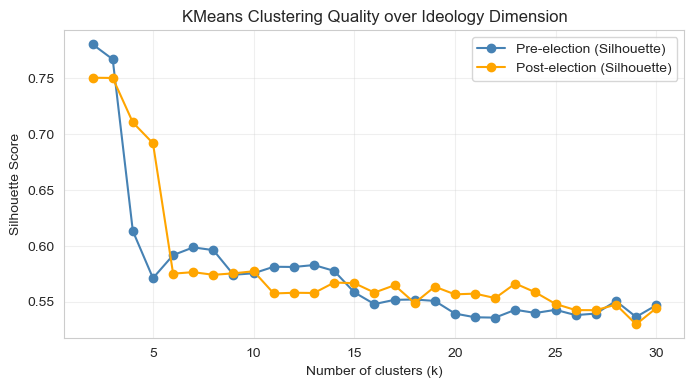

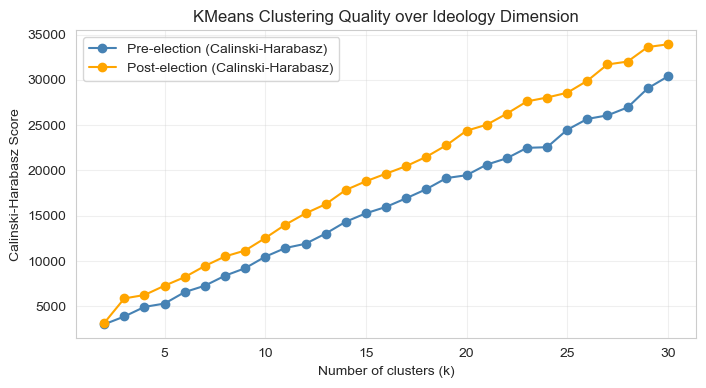

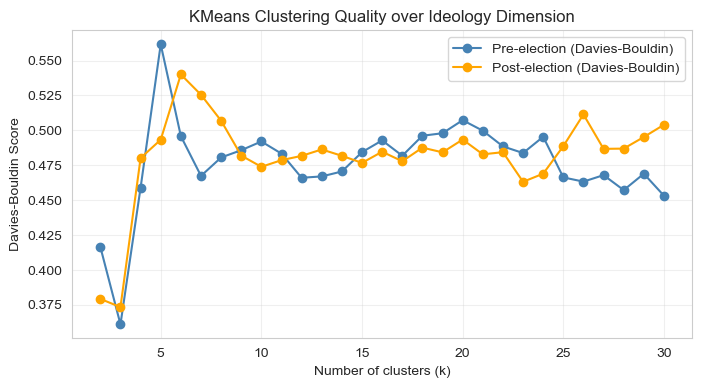

In [208]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans_clustering(df, ideology_col="_ideo", k_range=(1, 30)):
    """
    Evaluate how well KMeans fits the ideology distribution for different k.
    Returns a DataFrame with silhouette, CH, and DB scores.
    """
    X = df[[ideology_col]].dropna().to_numpy()
    results = []

    for k in range(k_range[0], k_range[1] + 1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = km.fit_predict(X)
        if len(set(labels)) > 1:  # avoid degenerate case
            sil = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            db = davies_bouldin_score(X, labels)
            results.append((k, sil, ch, db))
        else:
            results.append((k, np.nan, np.nan, np.nan))

    res_df = pd.DataFrame(results, columns=["k", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
    return res_df
res_pre = evaluate_kmeans_clustering(df_pre)
res_post = evaluate_kmeans_clustering(df_post)

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(res_pre["k"], res_pre["Silhouette"], 'o-', label="Pre-election (Silhouette)", color="steelblue")
ax1.plot(res_post["k"], res_post["Silhouette"], 'o-', label="Post-election (Silhouette)", color="orange")
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Silhouette Score")
ax1.set_title("KMeans Clustering Quality over Ideology Dimension")
ax1.legend()
plt.grid(alpha=0.3)
plt.show()

fig, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(res_pre["k"], res_pre["Calinski-Harabasz"], 'o-', label="Pre-election (Calinski-Harabasz)", color="steelblue")
ax2.plot(res_post["k"], res_post["Calinski-Harabasz"], 'o-', label="Post-election (Calinski-Harabasz)", color="orange")
ax2.set_xlabel("Number of clusters (k)")
ax2.set_ylabel("Calinski-Harabasz Score")
ax2.set_title("KMeans Clustering Quality over Ideology Dimension")
ax2.legend()
plt.grid(alpha=0.3)
plt.show()

fig, ax3 = plt.subplots(figsize=(8,4))
ax3.plot(res_pre["k"], res_pre["Davies-Bouldin"], 'o-', label="Pre-election (Davies-Bouldin)", color="steelblue")
ax3.plot(res_post["k"], res_post["Davies-Bouldin"], 'o-', label="Post-election (Davies-Bouldin)", color="orange")
ax3.set_xlabel("Number of clusters (k)")
ax3.set_ylabel("Davies-Bouldin Score")
ax3.set_title("KMeans Clustering Quality over Ideology Dimension")
ax3.legend()
plt.grid(alpha=0.3)
plt.show()


In this study, the ideology of each Member of the European Parliament (MEP) is derived directly from their roll-call voting behavior.

Each vote cast in plenary sessions is coded numerically — FOR as +1, AGAINST as −1, ABSTENTION as 0, and DID NOT VOTE as missing.

This encoding transforms the entire voting record of each MEP into a high-dimensional vector, where each dimension corresponds to a specific legislative resolution.

To capture the main underlying dimension of political disagreement — effectively the left–right ideological spectrum — a Principal Component Analysis (PCA) is performed on the centered vote matrix (where each column, i.e. each vote, is mean-centered to remove global tendencies toward approval or rejection).

PCA identifies the direction of maximum variance in voting patterns, meaning the first principal component represents the dominant axis along which MEPs systematically differ in their voting behavior. Each MEP’s score on this first component serves as their ideological coordinate: negative values indicate voting patterns more aligned with left-wing coalitions, while positive values correspond to right-wing or conservative voting alignments.

Because this method is purely data-driven, it does not rely on predefined party labels or external expert coding, but instead infers ideology as the statistical structure that best summarizes consistent patterns of political opposition and agreement in the European Parliament.

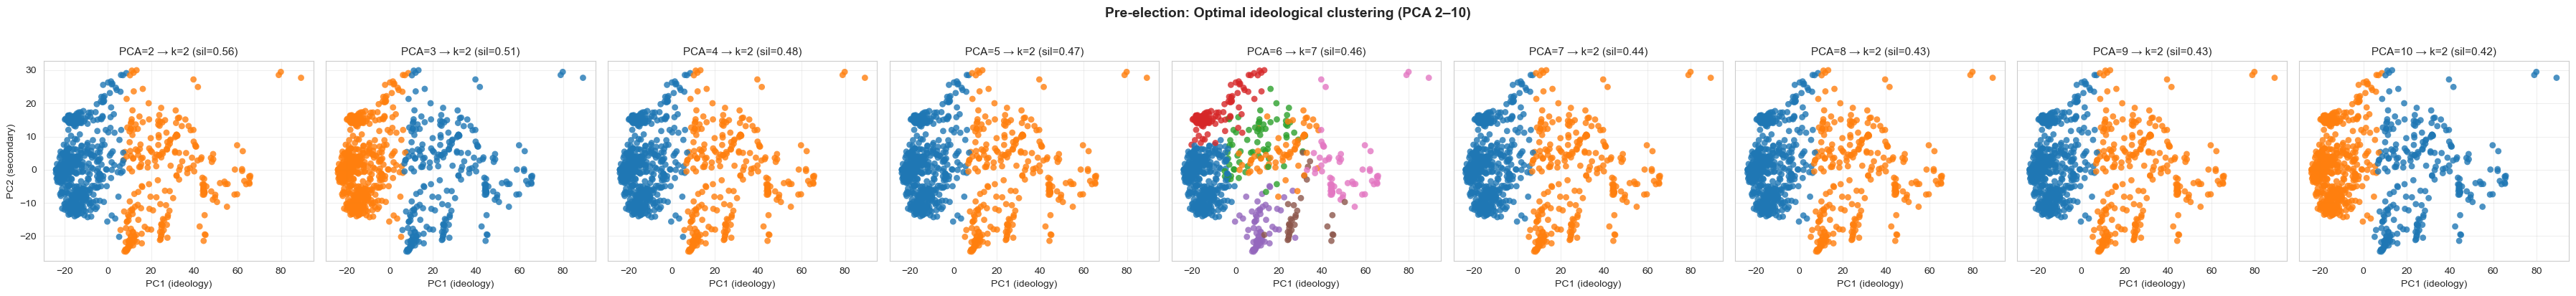

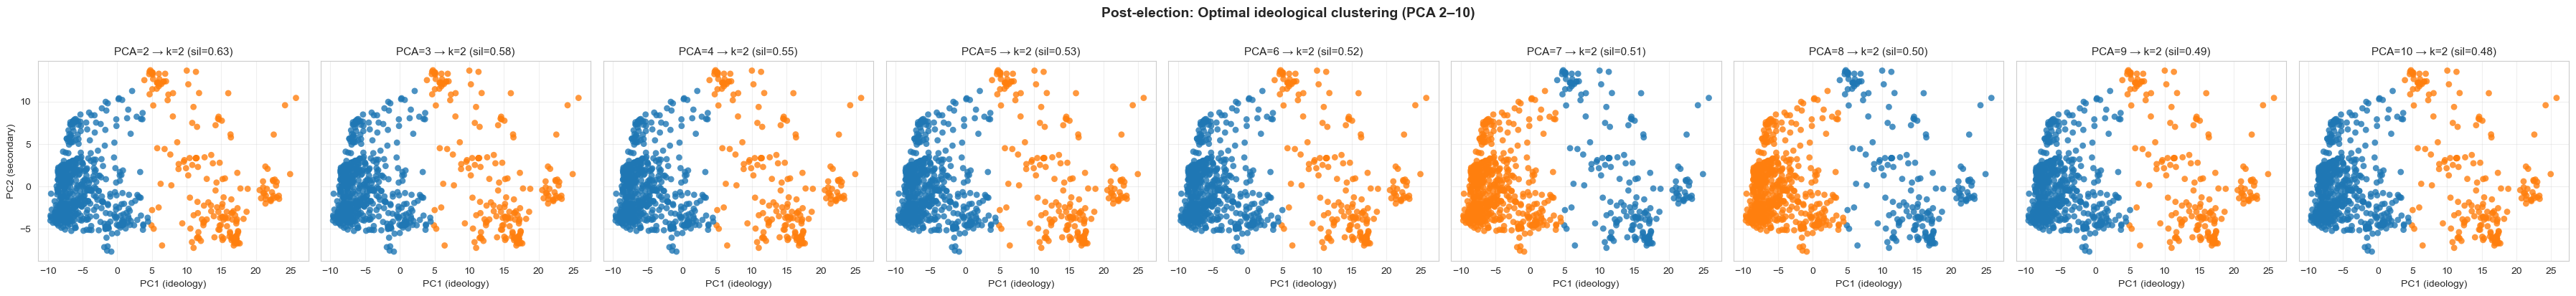

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def best_kmeans_k(X, k_min=2, k_max=10, random_state=42):
    """Find the best k for KMeans using silhouette score."""
    best_k, best_score = k_min, -1
    for k in range(k_min, k_max+1):
        km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        labels = km.fit_predict(X)
        if len(set(labels)) > 1:  # silhouette needs >1 cluster
            score = silhouette_score(X, labels)
            # print k and score
            #print(f"k={k}, score={score}")
            if score > best_score:
                best_score, best_k = score, k
    return best_k, best_score

def pca_cluster_optimal(df, vote_cols, max_dim=6, random_state=42, title_prefix="Pre-election"):
    """
    For each PCA dimension (2..max_dim):
      1. Project MEPs into n-dimensional PCA space.
      2. Automatically determine best number of clusters (k) via silhouette score.
      3. Plot clustering (projected on PC1 & PC2) with optimal k.
    """
    # --- Encode votes numerically ---
    enc = {'FOR': 1, 'AGAINST': -1, 'ABSTENTION': 0, 'DID_NOT_VOTE': 0}
    M = df[vote_cols].replace(enc).fillna(0).to_numpy()

    # --- Standardize ---
    M_std = StandardScaler().fit_transform(M)

    # --- Prepare plot grid ---
    fig, axes = plt.subplots(1, max_dim-1, figsize=(4*(max_dim-1), 4), sharex=True, sharey=True)
    if max_dim-1 == 1:
        axes = [axes]

    # --- Iterate over PCA dimensionalities ---
    for i, n_comp in enumerate(range(2, max_dim+1)):
        pca = PCA(n_components=n_comp, random_state=random_state)
        pcs = pca.fit_transform(M_std)

        # Find best k automatically
        best_k, best_score = best_kmeans_k(pcs, k_min=2, k_max=10, random_state=random_state)
        km = KMeans(n_clusters=best_k, n_init=10, random_state=random_state)
        clusters = km.fit_predict(pcs)

        # Prepare for plotting (first 2 PCs)
        df_plot = pd.DataFrame({
            "PC1": pcs[:, 0],
            "PC2": pcs[:, 1],
            "cluster": clusters
        })

        ax = axes[i]
        sns.scatterplot(
            data=df_plot,
            x="PC1", y="PC2",
            hue="cluster",
            palette="tab10",
            s=40, alpha=0.8, edgecolor="none",
            ax=ax, legend=False
        )

        ax.set_title(f"PCA={n_comp} → k={best_k} (sil={best_score:.2f})", fontsize=11)
        ax.set_xlabel("PC1 (ideology)")
        ax.set_ylabel("PC2 (secondary)")
        ax.grid(alpha=0.3)

    fig.suptitle(f"{title_prefix}: Optimal ideological clustering (PCA 2–{max_dim})",
                 fontsize=14, weight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

pca_cluster_optimal(df_pre, vote_cols_pre, max_dim=10, title_prefix="Pre-election")
pca_cluster_optimal(df_post, vote_cols_post, max_dim=10, title_prefix="Post-election")

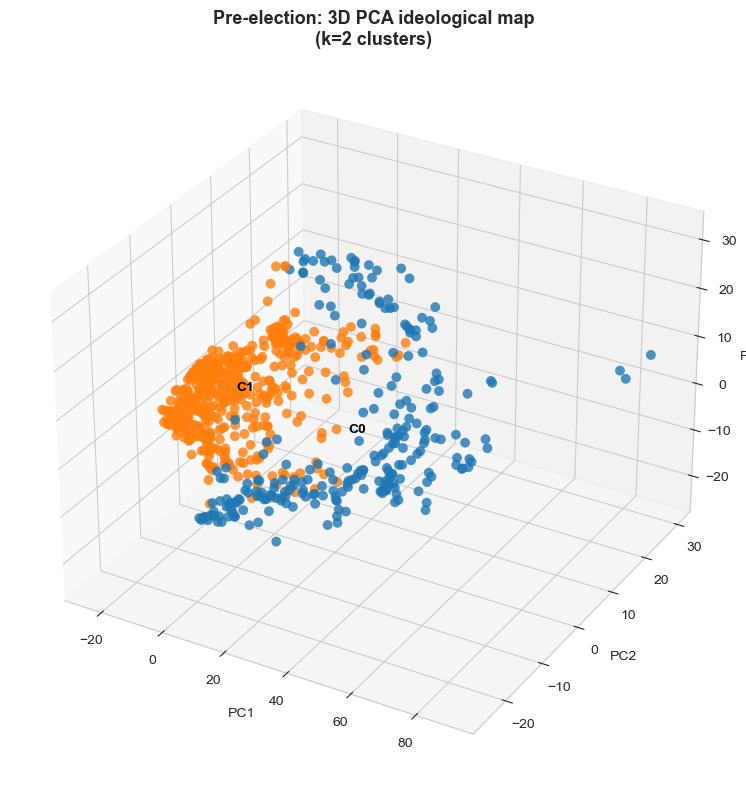

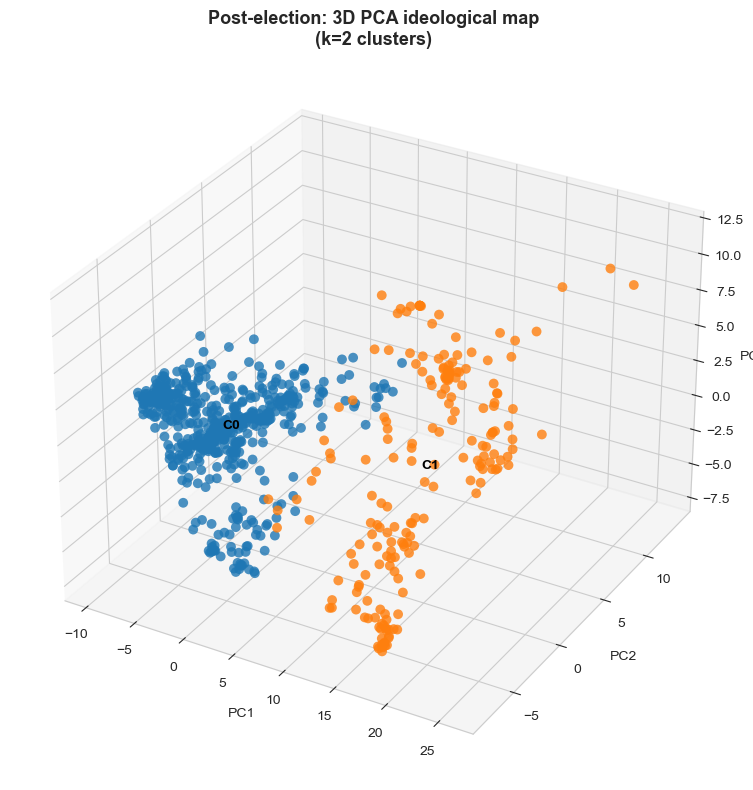

In [238]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def plot_pca_3d(df, vote_cols, title="3D PCA of MEP ideological space", k=None, random_state=42):
    """
    3D PCA plot of MEPs:
    - vote_cols: columns with vote outcomes
    - k: number of clusters (optional, auto-chosen if None)
    """

    # --- Encode votes numerically ---
    enc = {'FOR': 1, 'AGAINST': -1, 'ABSTENTION': 0, 'DID_NOT_VOTE': 0}
    M = df[vote_cols].replace(enc).fillna(0).to_numpy()

    # --- Standardize and compute PCA (3 components) ---
    M_std = StandardScaler().fit_transform(M)
    pca = PCA(n_components=3, random_state=random_state)
    pcs = pca.fit_transform(M_std)

    # --- Optional: cluster in 3D space ---
    if k is None:
        inertias = []
        K = range(2, 5)
        for kk in K:
            km = KMeans(n_clusters=kk, n_init=10, random_state=random_state)
            km.fit(pcs)
            inertias.append(km.inertia_)
        # choose k via elbow (min curvature)
        k = K[np.argmin(np.gradient(np.gradient(inertias)))]

    km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    labels = km.fit_predict(pcs)

    # --- Create DataFrame for plotting ---
    df_plot = pd.DataFrame({
        "PC1": pcs[:, 0],
        "PC2": pcs[:, 1],
        "PC3": pcs[:, 2],
        "cluster": labels,
        "party": df["member.group.short_label"]
    })

    # --- 3D plot ---
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    palette = sns.color_palette("tab10", n_colors=len(set(labels)))
    colors = [palette[l] for l in labels]

    ax.scatter(
        df_plot["PC1"], df_plot["PC2"], df_plot["PC3"],
        c=colors, s=50, alpha=0.8, edgecolor="none"
    )

    # --- Label axes and add title ---
    ax.set_xlabel("PC1", fontsize=10)
    ax.set_ylabel("PC2", fontsize=10)
    ax.set_zlabel("PC3", fontsize=10)
    ax.set_title(f"{title}\n(k={k} clusters)", fontsize=13, weight="bold")

    # --- Legend (cluster IDs) ---
    for cluster_id in sorted(set(labels)):
        cluster_center = pcs[labels == cluster_id].mean(axis=0)
        ax.text(cluster_center[0], cluster_center[1], cluster_center[2],
                f"C{cluster_id}", fontsize=10, weight="bold", color="black")

    plt.tight_layout()
    plt.show()

plot_pca_3d(df_pre, vote_cols_pre, title="Pre-election: 3D PCA ideological map")
plot_pca_3d(df_post, vote_cols_post, title="Post-election: 3D PCA ideological map")